In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_id='1_MhHDvSkNuaQHUIe4GVtjRfz0ASFdLIg'
file_name='loan.csv'

train_downloaded = drive.CreateFile({'id':file_id })
train_downloaded.GetContentFile(file_name) 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 8,6

In [5]:

loan_data = pd.read_csv(file_name,low_memory=False, parse_dates=['issue_d'])
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan_data.shape

(887379, 74)

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null datetime64[ns]
loan_status  

In [8]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [9]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [10]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [12]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [13]:
print(loan_data.isnull().sum())

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [14]:
loan_data.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,1.000000,0.999443,0.063803,0.066058,0.071502,-0.142963,0.025347,0.033990,0.067781,0.049648,...,0.009510,0.009703,0.011797,0.004960,-0.000543,0.000428,0.048724,-0.013579,-0.000914,0.014084
member_id,0.999443,1.000000,0.064461,0.066754,0.072308,-0.142205,0.026036,0.034146,0.067824,0.049904,...,0.005955,0.009033,0.006729,0.003529,-0.003295,0.000492,0.048660,-0.013022,-0.005038,0.012763
loan_amnt,0.063803,0.064461,1.000000,0.999263,0.997115,0.145023,0.944977,0.332698,0.020675,-0.000159,...,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928
funded_amnt,0.066058,0.066754,0.999263,1.000000,0.998025,0.145160,0.946005,0.332466,0.021075,0.000151,...,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928
funded_amnt_inv,0.071502,0.072308,0.997115,0.998025,1.000000,0.145205,0.943632,0.331420,0.022185,0.000648,...,0.135529,-0.107337,-0.051439,-0.028118,0.412268,0.018969,0.312473,0.009548,0.071515,0.007820
int_rate,-0.142963,-0.142205,0.145023,0.145160,0.145205,1.000000,0.133075,-0.072786,0.079903,0.055178,...,0.053045,0.183565,0.176683,0.171105,-0.104402,0.288049,-0.166119,0.171162,0.020711,0.252637
installment,0.025347,0.026036,0.944977,0.946005,0.943632,0.133075,1.000000,0.326182,0.014333,0.007876,...,0.116193,-0.102522,-0.022923,-0.004324,0.385694,0.025131,0.286829,0.015213,0.056176,0.029699
annual_inc,0.033990,0.034146,0.332698,0.332466,0.331420,-0.072786,0.326182,1.000000,-0.087410,0.047470,...,0.215808,-0.050157,-0.006532,-0.011844,0.323838,0.009813,0.268860,0.063758,0.052432,0.079720
dti,0.067781,0.067824,0.020675,0.021075,0.022185,0.079903,0.014333,-0.087410,1.000000,-0.002831,...,0.028134,-0.004285,-0.003016,-0.001053,0.010856,0.034614,0.032941,0.011065,0.011851,0.003552
delinq_2yrs,0.049648,0.049904,-0.000159,0.000151,0.000648,0.055178,0.007876,0.047470,-0.002831,1.000000,...,0.061545,-0.012308,-0.025960,-0.054318,-0.063617,0.003157,-0.041070,0.040830,0.014746,0.034490


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


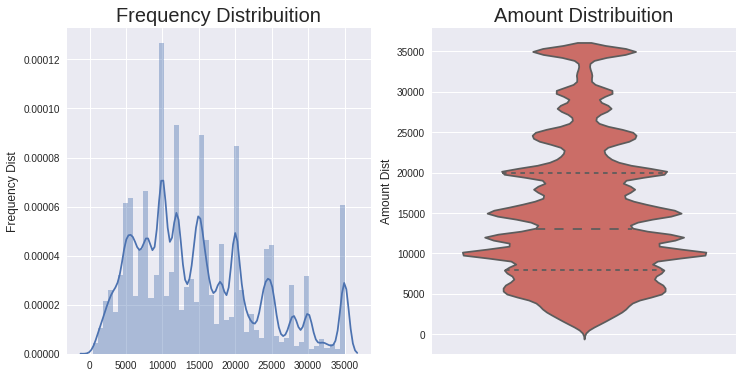

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(loan_data["loan_amnt"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amnt", data=loan_data, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


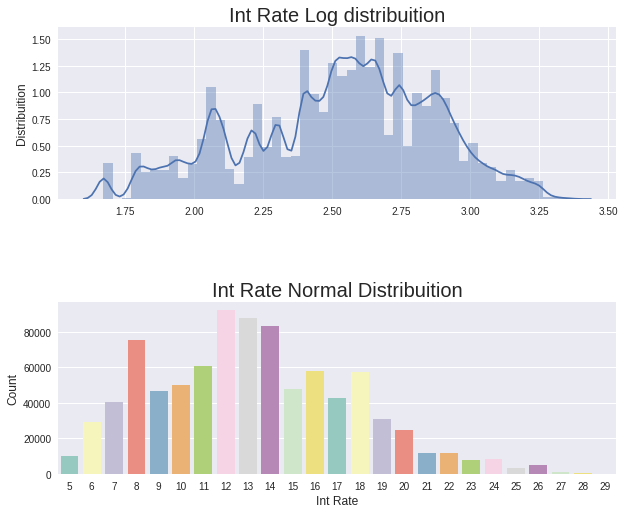

In [16]:
loan_data['int_round'] = loan_data['int_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

#Exploring the Int_rate
plt.subplot(211)
g = sns.distplot(np.log(loan_data["int_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Int Rate Log distribuition", fontsize=20)

plt.subplot(212)
g1 = sns.countplot(x="int_round",data=loan_data, 
                   palette="Set3")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Int Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()

In [0]:
loan_data.loc[loan_data.loan_status == 'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
loan_data.loc[loan_data.loan_status == \
            'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'

Current               601779
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
NMCP Fully Paid         1988
Default                 1219
NMCP Charged Off         761
Name: loan_status, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


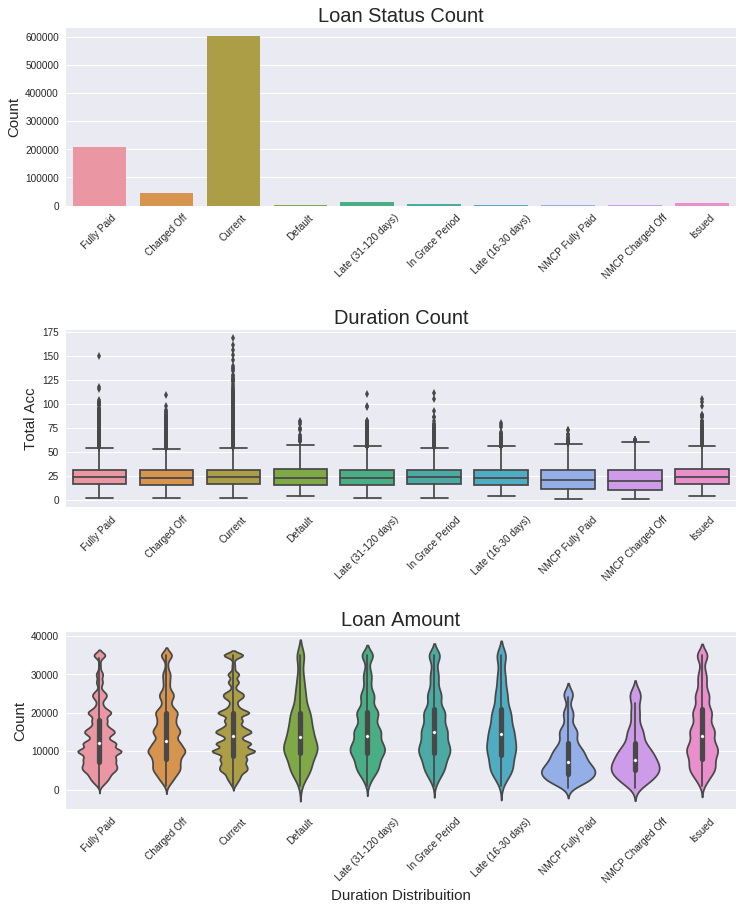

In [18]:
print(loan_data.loan_status.value_counts())

plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=loan_data)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="total_acc", data=loan_data)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Total Acc", fontsize=15)
g1.set_title("Duration Count", fontsize=20)

plt.subplot(313)
g2 = sns.violinplot(x="loan_status", y="loan_amnt", data=loan_data)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Duration Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Loan Amount", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

In [0]:
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month

In [20]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,int_round,issue_year,issue_month
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2011,12
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,2011,12
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,2011,12
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,2011,12
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,2011,12


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


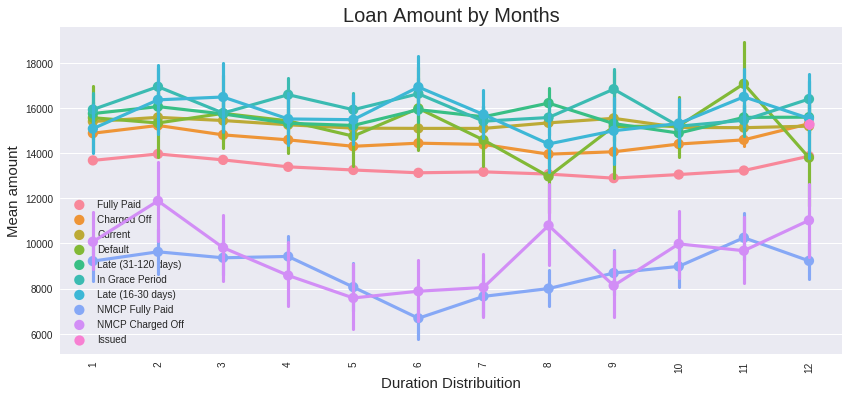

In [21]:
#months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
#data['issue_month'] = pd.Categorical(data['issue_month'],categories=months_order, ordered=True)

#Issue_d x loan_amount
plt.figure(figsize = (14,6))

g = sns.pointplot(x='issue_month', y='loan_amnt', 
                  data=loan_data, 
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


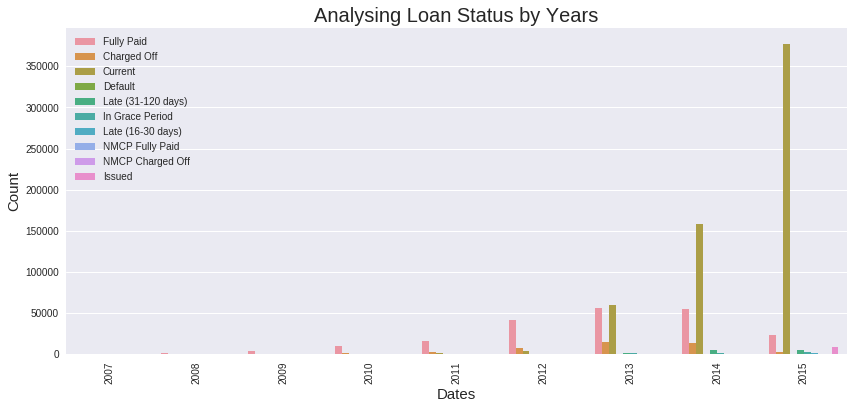

In [22]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=loan_data,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.


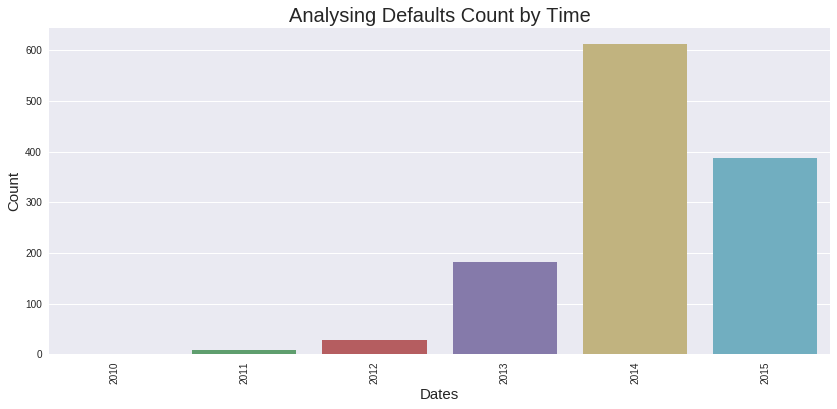

In [23]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status'] =='Default'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Defaults Count by Time", fontsize=20)
plt.show()

In [25]:
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_data[purp_loan[0]], loan_data[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),NMCP Charged Off,NMCP Fully Paid
purpose,,,,,,,,,,
car,448,4937,10,3198,40,81,15,70,13,51
credit_card,7826,149835,233,42250,1150,2071,381,2096,69,271
debt_consolidation,27599,356239,790,120764,3998,4796,1510,7419,292,808
educational,56,1,0,269,0,0,0,0,32,65
home_improvement,2269,34980,47,12660,367,493,137,662,71,143
house,286,1854,7,1366,37,37,15,61,11,33
major_purchase,874,10308,14,5391,125,184,51,207,23,100
medical,569,5324,15,2285,56,91,17,125,22,36
moving,425,3121,11,1603,43,52,23,90,15,31


In [26]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_data[loan_grade[0]], loan_data[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2617,9519,12642,10486,6258,2934,792
Current,103322,171735,171175,91984,47061,13589,2913
Default,47,198,360,312,201,79,22
Fully Paid,39679,66546,52678,30020,12928,4726,1146
In Grace Period,365,1240,1887,1405,908,354,94
Issued,1448,2529,2472,1185,593,194,39
Late (16-30 days),134,410,678,569,368,155,43
Late (31-120 days),492,2004,3339,2890,1852,768,246
NMCP Charged Off,8,85,148,197,158,93,72


In [27]:
loan_home = ['loan_status', 'home_ownership']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_data[loan_home[0]], loan_data[loan_home[1]]).style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0,19878,7,27,4025,21311
Current,2,303764,2,3,62041,235967
Default,0,498,0,0,110,611
Fully Paid,1,104966,36,114,17960,84646
In Grace Period,0,2855,0,0,637,2761
Issued,0,4220,0,0,1038,3202
Late (16-30 days),0,1101,0,0,260,996
Late (31-120 days),0,5019,0,0,1212,5360
NMCP Charged Off,0,348,1,11,49,352


In [28]:
#Looking the 'verification_status' column that is the Indicates 
#if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
loan_verification = ['loan_status', 'verification_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_data[loan_verification[0]], loan_data[loan_verification[1]]).style.background_gradient(cmap = cm)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,12208,13740,19300
Current,171400,243705,186674
Default,278,462,479
Fully Paid,73856,60271,73596
In Grace Period,1403,2523,2327
Issued,2779,2836,2845
Late (16-30 days),473,1006,878
Late (31-120 days),2521,4725,4345
NMCP Charged Off,511,82,168


In [29]:
import plotly.plotly as py
py.sign_in('fsiinfotech', '3y5aUJIrdCHDfziauVC5')
#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter

#First plot
trace0 = go.Bar(
    x = loan_data['verification_status'].value_counts().index.values,
    y = loan_data['verification_status'].value_counts().values,
    marker=dict(
        color=loan_data['verification_status'].value_counts().values,
        colorscale = 'Viridis'
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Status'
    ),
    title='Verification Status Count'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='verification-bar')

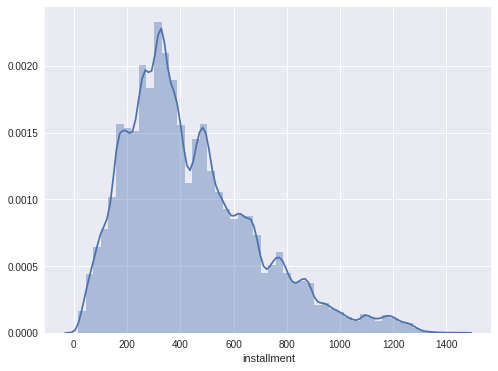

In [30]:
sns.distplot(loan_data['installment'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



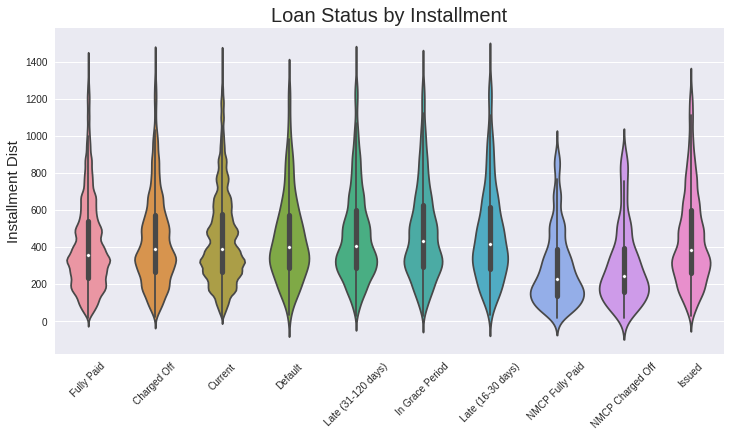

In [31]:
plt.figure(figsize = (12,6))

g = sns.violinplot(x='loan_status', y="installment",
                   data=loan_data)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Installment Dist", fontsize=15)
g.set_title("Loan Status by Installment", fontsize=20)

plt.show()


In [32]:
#Exploring the loan_status x Application_type
loan_application = ['loan_status', 'application_type']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_data[loan_application[0]], loan_data[loan_application[1]]).style.background_gradient(cmap = cm)

application_type,INDIVIDUAL,JOINT
loan_status,,
Charged Off,45248,0
Current,601338,441
Default,1219,0
Fully Paid,207722,1
In Grace Period,6250,3
Issued,8396,64
Late (16-30 days),2357,0
Late (31-120 days),11589,2
NMCP Charged Off,761,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



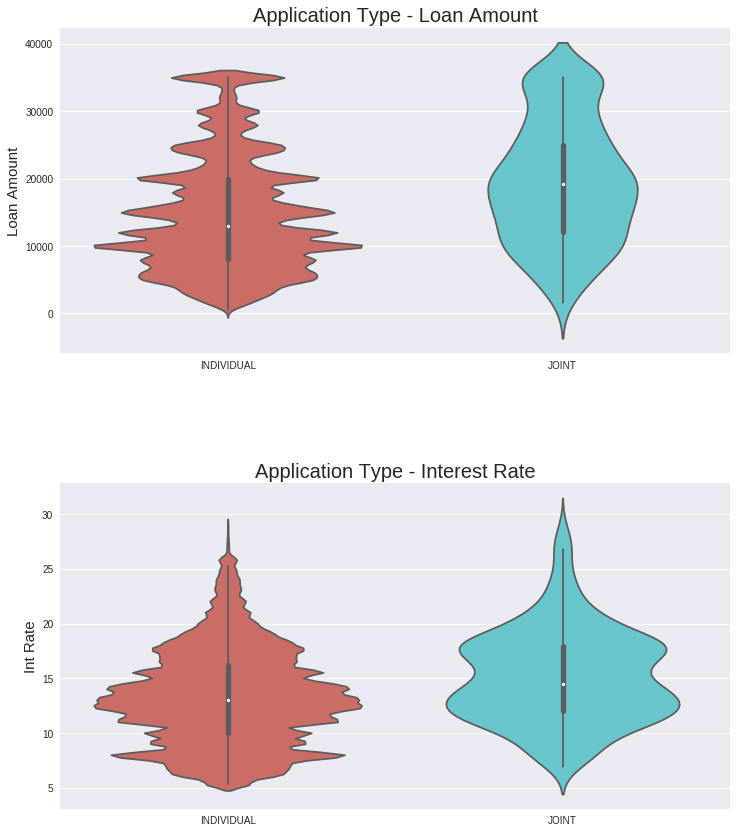

In [33]:
plt.figure(figsize = (12,14))
#The amount and int rate x application_type 
plt.subplot(211)
g = sns.violinplot(x="application_type", y="loan_amnt",data=loan_data, 
            palette="hls")
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="application_type", y="int_rate",data=loan_data,
               palette="hls")
g1.set_title("Application Type - Interest Rate", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Int Rate", fontsize=15)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



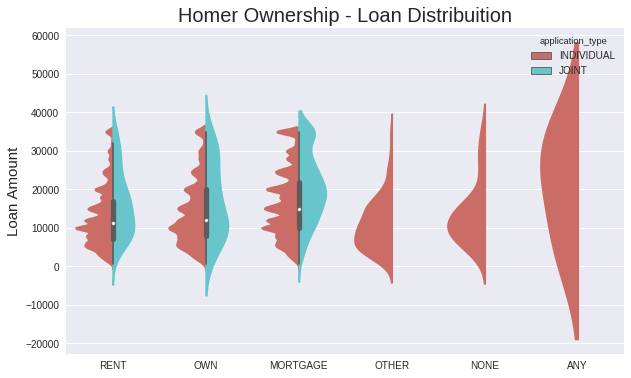

In [34]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="home_ownership",y="loan_amnt",data=loan_data,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g.set_title("Homer Ownership - Loan Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.show()


Purposes count description: 
application_type    INDIVIDUAL  JOINT
purpose                              
car                       8862      1
credit_card             206067    115
debt_consolidation      523881    334
educational                423      0
home_improvement         51803     26
house                     3707      0
major_purchase           17275      2
medical                   8538      2
moving                    5413      1
other                    42867     27
renewable_energy           575      0
small_business           10375      2
vacation                  4735      1
wedding                   2347      0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



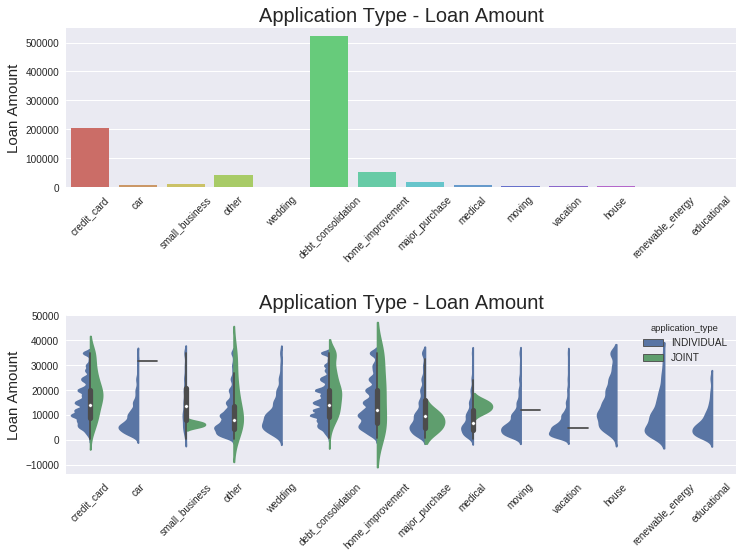

In [35]:
# Now will start exploring the Purpose variable
print("Purposes count description: ")
print(pd.crosstab(loan_data.purpose, loan_data.application_type))

plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.countplot(x="purpose",data=loan_data,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="purpose",y="loan_amnt",data=loan_data,
               hue="application_type", split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Application Type - Loan Amount", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Loan Amount", fontsize=15)

plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:932: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1924: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



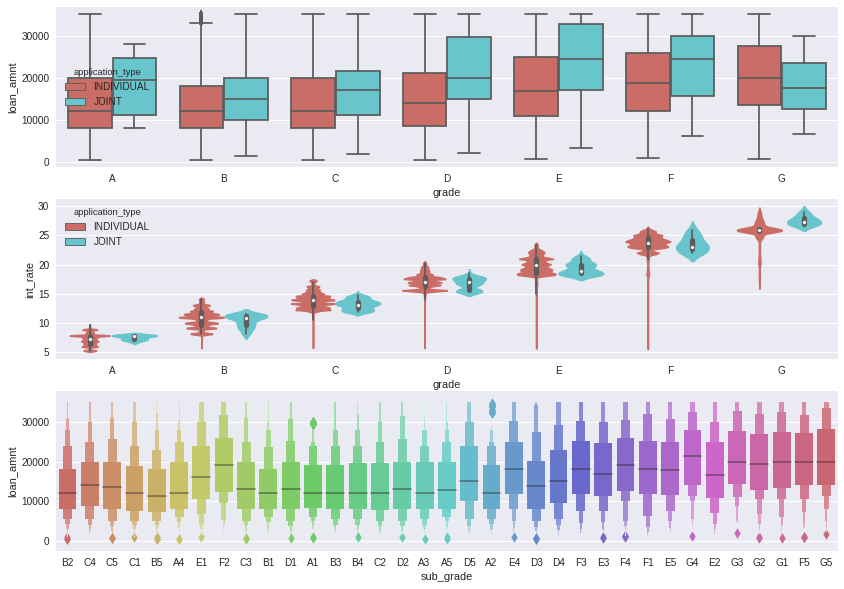

In [36]:
fig, ax = plt.subplots(3,1, figsize=(14,10))
sns.boxplot(x="grade", y="loan_amnt", data=loan_data,
            palette="hls",ax=ax[0], hue="application_type", 
            order=["A",'B','C','D','E','F', 'G'])
sns.violinplot(x='grade', y="int_rate",data=loan_data, 
              hue="application_type", palette = "hls", ax=ax[1], 
            order=["A",'B','C','D','E','F', 'G'])
sns.lvplot(x="sub_grade", y="loan_amnt",data=loan_data, 
               palette="hls", ax=ax[2])

plt.show()

In [37]:
#First plot

trace0 = go.Bar(
    x = loan_data.emp_title.value_counts()[:40].index.values,
    y = loan_data.emp_title.value_counts()[:40].values,
    marker=dict(
        color=loan_data.emp_title.value_counts()[:40].values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
       title='Employment name'
    ),
    title='TOP 40 Employment Title'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')

In [38]:
#First plot

trace0 = go.Bar(
    x = loan_data.title.value_counts()[:40].index.values,
    y = loan_data.title.value_counts()[:40].values,
    marker=dict(
        color=loan_data.title.value_counts()[:40].values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Employment name'
    ),
    title='TOP 40 Employment Title'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')

application_type  INDIVIDUAL  JOINT
emp_length                         
1 year                 57064     31
10+ years             291403    166
2 years                78833     37
3 years                69994     32
4 years                52496     33
5 years                55686     18
6 years                42928     22
7 years                44576     18
8 years                43930     25
9 years                34635     22
< 1 year               70559     46


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

No handles with labels found to put in legend.


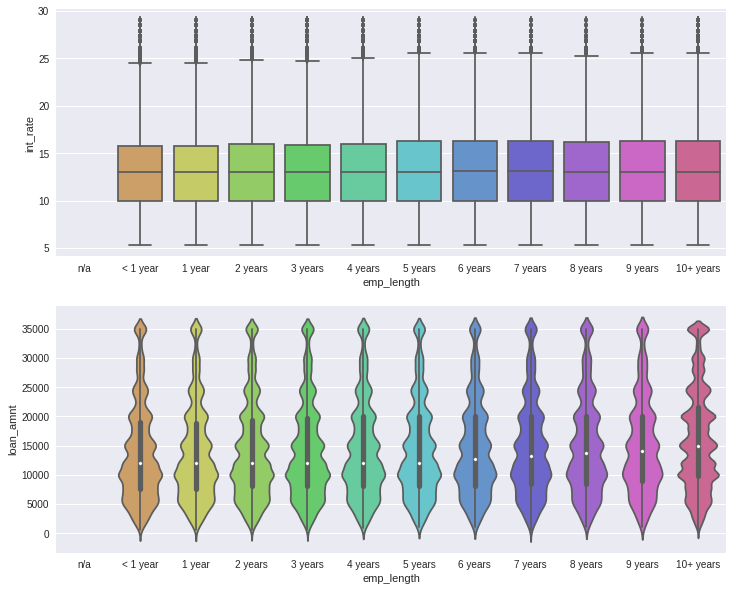

In [39]:
# emp_lenght description: 
# Employment length in years. Possible values are between 0 and 10 where 0 means 
# less than one year and 10 means ten or more years. 

print(pd.crosstab(loan_data["emp_length"], loan_data["application_type"]))

fig, ax = plt.subplots(2,1, figsize=(12,10))
g = sns.boxplot(x="emp_length", y="int_rate", data=loan_data,
              palette="hls",ax=ax[0],
               order=["n/a",'< 1 year','1 year','2 years','3 years','4 years', '5 years',
                      '6 years', '7 years', '8 years','9 years','10+ years'])

z = sns.violinplot(x="emp_length", y="loan_amnt",data=loan_data, 
               palette="hls", ax=ax[1],
               order=["n/a",'< 1 year','1 year','2 years','3 years','4 years', '5 years',
                      '6 years', '7 years', '8 years','9 years','10+ years'])
               
plt.legend(loc='upper left')
plt.show()

In [40]:
print('Term x application type Description')
print(pd.crosstab(loan_data.term, loan_data.application_type))

#First plot
trace0 = go.Bar(
    x = loan_data.term.value_counts().index.values,
    y = loan_data.term.value_counts().values,
    marker=dict(
        color=loan_data.term.value_counts().values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Term name'
    ),
    title='Term Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Term-bar')

Term x application type Description
application_type  INDIVIDUAL  JOINT
term                               
 36 months            620886    239
 60 months            265982    272


In [41]:
#Exploring the State Adress x Loan Status
adress_loan = ['addr_state', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_data[adress_loan[0]], loan_data[adress_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),NMCP Charged Off,NMCP Fully Paid
addr_state,,,,,,,,,,
AK,96,1469,2,567,15,14,6,31,1,4
AL,662,7576,9,2485,111,122,43,160,8,24
AR,337,4637,8,1417,57,70,13,86,6,9
AZ,1049,13577,39,5028,143,193,50,282,18,33
CA,7332,81851,211,35778,906,1147,327,1641,101,223
CO,784,12573,25,4829,106,166,57,202,13,52
CT,614,9353,8,3067,126,139,29,133,12,50
DC,87,1543,2,750,10,13,0,17,2,8
DE,121,1730,5,546,21,28,7,31,4,18
